In [3]:
from google.colab import files
a = files.upload()

Saving train_challenge.csv to train_challenge.csv


In [4]:
import pandas as pd
import numpy as np

In [5]:
df_train = pd.read_csv('/content/train_challenge.csv')

In [6]:
df_train.head()

,0,1
0,0.jpg,Adhered
1,1.jpg,Adhered
2,2.jpg,Concrete
3,3.jpg,Concrete
4,4.jpg,Plastic & fabric


In [7]:
np.unique(df_train['1'])

array(['Adhered', 'Ballasted', 'Concrete', 'Plastic & fabric', 'Shingle',
       'Steel'], dtype=object)

In [8]:
df_train['1'].replace('Adhered',0,inplace=True)
df_train['1'].replace('Ballasted',1,inplace=True)
df_train['1'].replace('Concrete',2,inplace=True)
df_train['1'].replace('Plastic & fabric',3,inplace=True)
df_train['1'].replace('Shingle',4,inplace=True)
df_train['1'].replace('Steel',5,inplace=True)

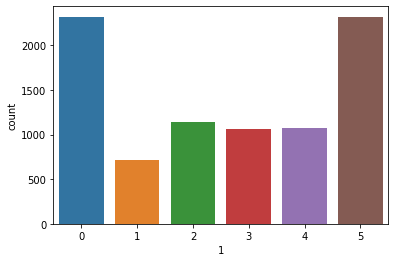

In [9]:
import seaborn as sns
sns.countplot(data=df_train,x='1')

In [10]:
y = df_train['1']
y

0       0
1       0
2       2
3       2
4       3
       ..
8639    0
8640    0
8641    0
8642    0
8643    0
Name: 1, Length: 8644, dtype: int64

In [11]:
#test path - /content/drive/MyDrive/internship/test
#train path - /content/drive/MyDrive/internship/train

In [12]:
from tensorflow import keras
from keras.applications.resnet50 import ResNet50
from keras.models import Model
from keras.layers import Dropout,Dense,Flatten,Softmax

In [14]:
IMAGE_SIZE = [224,224]
train_path = "/content/drive/MyDrive/internship/train"
valid_path = "/content/drive/MyDrive/internship/test"

In [15]:
resnet = ResNet50(include_top=False,input_shape=IMAGE_SIZE+[3],weights='imagenet')

94773248/94765736 [==============================] - 0s 0us/step


In [16]:
for layers in resnet.layers:
  layers.trainable = False

In [17]:
from glob import glob
folders = glob("/content/drive/MyDrive/internship/train/*")
len(folders)

15122

In [18]:
prediction = Dense(len(folders),activation='softmax')(resnet.output)

In [38]:
model = Model(inputs=resnet.input,outputs=prediction)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [39]:
from keras.preprocessing.image import ImageDataGenerator

In [40]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [80]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/internship/train',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 0 images belonging to 6 classes.


In [81]:
test_set = train_datagen.flow_from_directory("/content/drive/MyDrive/internship/test",target_size=(224,224),batch_size=32,class_mode='categorical')


Found 0 images belonging to 0 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

In [ ]:
prediction = r.predict(test_set)

In [ ]:
prediction.head()

In [ ]:
final_col = list(prediction)
for i in final_col:
  if i == 0:
    i = 'Adhered'
  elif i == 1:
    i = 'Ballasted'
  elif i == 2:
    i = 'Concrete'
  elif i == 3:
    i = 'Plastic & fabric'
  elif i == 4:
    i = 'Shingle'
  else:
    i = 'Steel'

In [ ]:
df_new = pd.DataFrame(test_set,final_col)

In [ ]:
df_new.to_csv('test_challenge')